## Problem 2: Ising model
*30 points*

Start from the `RandomNumbers/ising.ipynb` notebook in the CompPhys repository (the relevant parts have been copied here).

### Problem 2a
*10 points*

First, let's explore the effect of various parameters in the simulation. Recall that sudden reversals of the magnetization occur occasionally in systems of finite size. What is a reasonable value of `L` (number of spins per axis) to be chosen to maintain one single domain, versus flipping throughout? What value of `Nskip` (the number of spins flipped between each sample, aka the number of Metropolis-Hastings steps in between recorded samples) do you need to ensure an appropriate MC simulation? Show a plot of the average magnetization per spin at temperature T = 2.0 for various values of `L` and `Nskip`, and describe the result in your writeup.


### Problem 2b
*10 points*

Recall from the lectures that the analytical solution of the 2D Ising model predicts the following behavior of the average magnetization per spin: 

$$m\sim(T_C-T)^{\beta}$$. 

Starting from your simulation after part (a) (i.e. with a reasonable value of `L` and `Nskip`), re-run the simulation as a function of the temperature, $T$, and fit the resulting $\langle m \rangle$ versus $T$ for the the critical temperature, $T_C$, and the exponent, $\beta$. 


### Problem 2c
*10 points*

Similarly to part (b), use your simulation to compute the energy per spin as a function of $T$. Plot the result, and determine the heat capacity, $C=\frac{\partial E}{\partial T}$. 



### Recap of lectures

First, here is the notebook covered in class:

Now we will look at [Random walks](https://en.wikipedia.org/wiki/Random_walk) in n dimensions. This will be the first [Markov Chain Monte Carlo (MCMC)](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) that we will utilize. 

We will keep track of the paths of random walkers and use it to derive the conditions for diffusion in [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion). 


The "choice" and "cumsum" strategy here is adapted from [here](https://medium.com/@ensembledme/random-walks-with-python-8420981bc4bc)

In [1]:
import numpy as np
from numpy.random import default_rng # see https://numpy.org/doc/stable/reference/random/index.html#random-quick-start
rng = default_rng()
import matplotlib.pyplot as plt

### Run the walkers (in 1D)

In [2]:
n_walkers = 100
n_steps = 5000
t = np.arange(n_steps)
# Walkers can go in + direction, - direction, or stay still
step_set = np.array([[-1], [1]])
# The shape is for "n_walkers" taking "n_steps". The N spatial dimension are accounted for in step_set.
# So, in 1d if there are 10 walkers making 100 steps each, the shape is (10, 100)
step_shape = (n_walkers, n_steps)
# These are the steps at each stage
steps = rng.choice(a=step_set, size=step_shape)
# Now we add up the steps for each walker to get the x positions
x = steps.cumsum(axis=1) # axis=1 is the n_steps axis

### Plot the $x$ position of the first 10 walkers

Text(0, 0.5, 'x position')

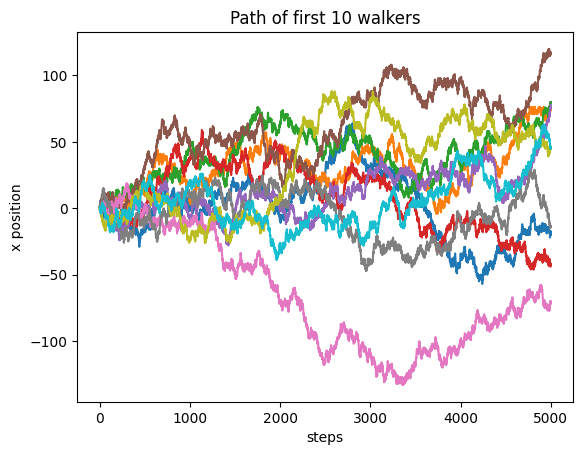

In [3]:
#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
for i in range( min(10,n_walkers) ):
    plt.plot(x[i, :, 0])
plt.title("Path of first 10 walkers")
plt.xlabel("steps")
plt.ylabel("x position")

### Accumulate statistics

Here, we now want to determine the relationship between diffusion and walks. 

We know from lecture that after the $n$th step, each walker will have position

$$
x_n = \sum_{i=1}^n s_i
$$

where $s_i$ is each walkers' step from the `steps` construct above. The average of $s_i$ is zero because they are uniformly chosen from $(-1,1)$. However, the standard deviation for each walker is

$$
\left< x_n^2 \right> = \left< \sum_{i=1}^{n} \sum_{j=1}^{n} s_i s_j \right>
$$

$$
\left< x_n^2 \right> = \left< \sum_{i} s_i^2 \right> + \left< \sum_i \sum_{j \neq i} s_i s_j \right>
$$

If there are $m$ walkers each walking $n$ steps, and the index $k$ iterates over the walkers, then at each step $n$ we have ensemble averages (in 1 dimension):

$$
\left< x_n^4 \right> = \sum_{k=1}^m \frac{x_{k,n}^4}{m}
$$

$$
\left< x_n^2 \right> = \sum_{k=1}^m \frac{x_{k,n}^2}{m}
$$

The overall diffusion width at the $n$th step, taking these ensemble averages, is therefore

$$
\sigma^2_n = \sqrt{  \left< x_n^4 \right> - \left< x_n^2\right>^2 }
$$

In [4]:
# Now get the averages over the walkers
x2 = np.average(x**2, axis=0) # axis=0 is the walker axis
x4 = np.average(x**4, axis=0)
sigma2_nd = np.sqrt(x4 - x2**2) # shape = (n_steps, n_dim)
sigma2 = np.sum(sigma2_nd, axis=1)

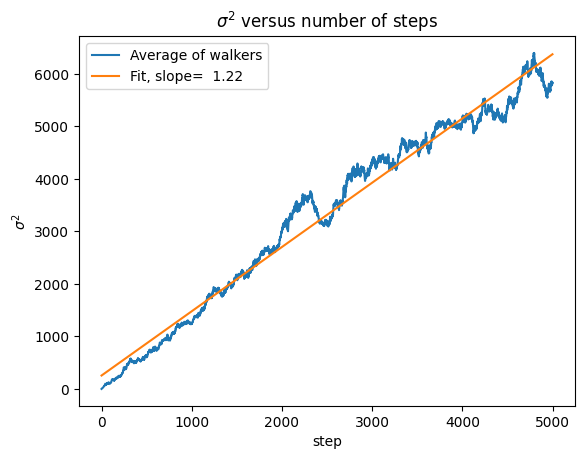

In [5]:
plt.plot( sigma2,  label='Average of walkers' )
res = np.polyfit(t, sigma2,1 )
plt.plot( t, res[0]*t + res[1], label='Fit, slope=%6.2f' % res[0] )
plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend()

### Your turn

Do your work starting here.